In [1]:
import pandas as pd
import numpy as np
import math
import geopandas as gpd
import matplotlib.pyplot as plt

#### read csv

In [8]:
gdf= gpd.read_file(f"zip://Hex350_grid_GLA.zip/Hex350_grid_GLA.shp")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15041 entries, 0 to 15040
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Col_ID      15041 non-null  int64   
 1   Row_ID      15041 non-null  int64   
 2   Hex_ID      15041 non-null  int64   
 3   Centroid_X  15041 non-null  float64 
 4   Centroid_Y  15041 non-null  float64 
 5   area        15041 non-null  float64 
 6   geometry    15041 non-null  geometry
dtypes: float64(3), geometry(1), int64(3)
memory usage: 822.7 KB


In [ ]:
gdf.plot()

In [10]:
gdf.to_csv("hex.csv")

### decay function plot

In [2]:
def gaussian(distance_array,sig):
    return np.exp(-(distance_array**2 / (2.0 * sig**2)))

In [3]:
def raised_cosine(distance_array,scale):
    masked_array=np.clip(distance_array,0.0,scale)
    return (1+np.cos((masked_array/scale)*math.pi))/2

In [4]:
def parabolic(distance_array,scale):
    return np.maximum(
        (scale**2 - distance_array**2) / scale**2,0)

In [18]:
distances = 4000
dist = 0.0
distance_array=[]
decay_value_gaussian=[]
decay_value_gaussian_2=[]
decay_value_parabolic=[]
decay_value_raisedcos=[]

while dist < distances:
    decay_value_gaussian.append(gaussian(dist,900))
    decay_value_gaussian_2.append(gaussian(dist,1800))
    decay_value_parabolic.append(parabolic(dist,1800))
    decay_value_raisedcos.append(raised_cosine(dist,1800))
    dist += 0.05
    distance_array.append(dist)

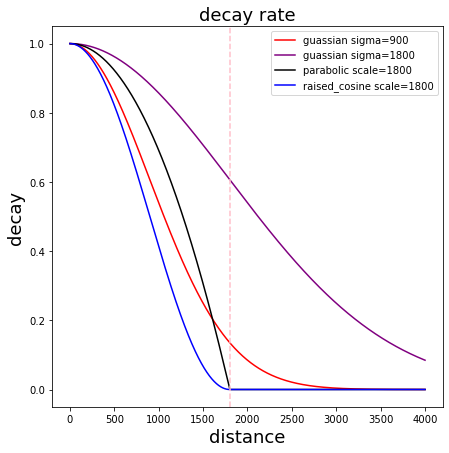

In [19]:
fig, ax = plt.subplots(figsize=(7,7))

x=distance_array
y1=decay_value_gaussian
y2=decay_value_gaussian_2
y3=decay_value_parabolic
y4=decay_value_raisedcos

plt.plot(x,y1,color="red",alpha=1,label="guassian sigma=900")
plt.plot(x,y2,color="purple",alpha=1,label="guassian sigma=1800")
plt.plot(x,y3,color="black",alpha=1,label="parabolic scale=1800")
plt.plot(x,y4,color="blue",alpha=1,label="raised_cosine scale=1800")

plt.axvline(x=1800,c="pink",ls="--")

plt.xlabel("distance",fontsize=18)
plt.ylabel("decay",fontsize=18)

plt.legend(fontsize=10)
plt.title("decay rate",fontsize=18)
plt.show()